In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from pandas import to_datetime

In [4]:
import itertools
import warnings

In [5]:
import datetime
from datetime import datetime

In [6]:
warnings.filterwarnings('ignore')

In [7]:
raw_csv_data = pd.read_csv("crime(with neighborhoods_completed).csv", low_memory=False)

In [8]:
raw_csv_data

,Unnamed: 0,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,...,hour_of_day,day_of_week,parent_incident_type,Census Tract 1,Census Block 1,Census Block Group 1,Neighborhood 1,Police District 1,Council District 1,neighborhood
0,59398,55236827.0,11-0050386,1910-12-22 00:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block CRESTWOOD AV,NaN,BUFFALO,...,0,Thursday,Theft,NaN,NaN,NaN,NaN,NaN,NaN,North Park
1,121306,710086379.0,15-0760407,1914-12-01 22:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,100 Block LINCOLN PW,NaN,BUFFALO,...,22,Tuesday,Theft,NaN,NaN,NaN,NaN,NaN,NaN,Elmwood Bidwell
2,204553,942663542.0,06-1840984,1951-07-03 19:51:00,UUV,Buffalo Police are investigating this report o...,NaN,200 Block W FERRY ST,NaN,BUFFALO,...,19,Tuesday,Theft of Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Upper West Side
3,146615,146621859.0,13-0730379,1951-12-05 02:20:21,ASSAULT,Buffalo Police are investigating this report o...,NaN,200 Block CAMBRIDGE AV,NaN,BUFFALO,...,2,Wednesday,Assault,NaN,NaN,NaN,NaN,NaN,NaN,Genesee-Moselle
4,233506,942606470.0,08-3530528,1952-08-30 16:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block JEFFERSON AV,NaN,BUFFALO,...,16,Saturday,Theft,NaN,NaN,NaN,NaN,NaN,NaN,Broadway Fillmore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267794,76165,146331068.0,13-0720178,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,1 Block PLYMOUTH AV,NaN,BUFFALO,...,0,NaN,Theft,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267795,138540,360846240.0,14-0420506,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,NaN,NaN,Buffalo,...,0,NaN,Theft,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267796,144972,57717874.0,11-0400654,NaN,BURGLARY,Buffalo Police are investigating this report o...,NaN,BROADWAY & BAILEY AV,NaN,BUFFALO,...,0,NaN,Breaking & Entering,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267797,153857,50578953.0,10-3130893,NaN,ASSAULT,Buffalo Police are investigating this report o...,NaN,200 Block STEVENSON ST,NaN,BUFFALO,...,0,NaN,Assault,NaN,NaN,NaN,NaN,NaN,NaN,Seneca-Cazenovia


In [9]:
data = raw_csv_data.loc[:,['incident_datetime', 'neighborhood']]

In [10]:
data

,incident_datetime,neighborhood
0,1910-12-22 00:00:00,North Park
1,1914-12-01 22:00:00,Elmwood Bidwell
2,1951-07-03 19:51:00,Upper West Side
3,1951-12-05 02:20:21,Genesee-Moselle
4,1952-08-30 16:00:00,Broadway Fillmore
...,...,...
267794,NaN,NaN
267795,NaN,NaN
267796,NaN,NaN
267797,NaN,Seneca-Cazenovia


In [11]:
data.isna().sum()

incident_datetime       5
neighborhood         3414
dtype: int64

In [12]:
data.incident_datetime = pd.to_datetime(data.incident_datetime)

## Grouping data by number of incidents in a single day on a particular neighborhood

In [13]:
data = pd.DataFrame({'no_of_incidents' : data.groupby( [ data.neighborhood, data.incident_datetime.dt.date] ).size()}).reset_index()

In [14]:
data

,neighborhood,incident_datetime,no_of_incidents
0,Allentown,2000-07-12,1
1,Allentown,2000-10-12,1
2,Allentown,2001-07-19,1
3,Allentown,2004-01-06,1
4,Allentown,2004-02-03,1
...,...,...,...
127473,West Side,2021-02-06,1
127474,West Side,2021-02-08,1
127475,West Side,2021-02-09,1
127476,West Side,2021-02-10,3


In [15]:
data.isna().sum()

neighborhood         0
incident_datetime    0
no_of_incidents      0
dtype: int64

In [16]:
data.no_of_incidents.sum()

264384

## Splitting the data

In [17]:
data.incident_datetime = pd.to_datetime(data.incident_datetime)

In [18]:
import matplotlib.pyplot as plt

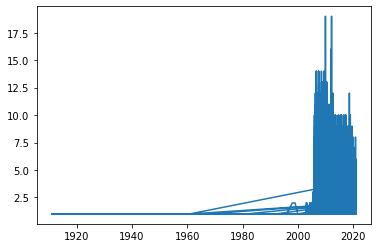

In [19]:
plt.plot(data.incident_datetime, data.no_of_incidents)
plt.show()

In [20]:
data = data[data['incident_datetime'] >= '2019-01-01']

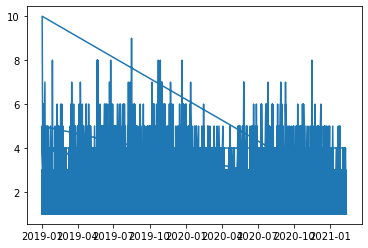

In [21]:
plt.plot(data.incident_datetime, data.no_of_incidents)
plt.show()

In [22]:
X_train = data[data['incident_datetime'] < '2020-08-01']
X_test = data[data['incident_datetime'] >= '2020-08-01']

In [23]:
X_train.shape

(11554, 3)

In [24]:
X_test.shape

(3787, 3)

# ARIMA for a single neighborhood

In [25]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [26]:
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## Training data set

In [27]:
al_train = X_train[X_train['neighborhood'] == 'Allentown']

In [28]:
al_train

,neighborhood,incident_datetime,no_of_incidents
3092,Allentown,2019-01-01,2
3093,Allentown,2019-01-02,1
3094,Allentown,2019-01-03,1
3095,Allentown,2019-01-04,2
3096,Allentown,2019-01-05,1
...,...,...,...
3393,Allentown,2020-07-21,1
3394,Allentown,2020-07-23,2
3395,Allentown,2020-07-26,1
3396,Allentown,2020-07-27,1


In [29]:
al_train1 = al_train[['incident_datetime', 'no_of_incidents']]

In [30]:
al_train1

,incident_datetime,no_of_incidents
3092,2019-01-01,2
3093,2019-01-02,1
3094,2019-01-03,1
3095,2019-01-04,2
3096,2019-01-05,1
...,...,...
3393,2020-07-21,1
3394,2020-07-23,2
3395,2020-07-26,1
3396,2020-07-27,1


In [31]:
al_train1.set_index('incident_datetime', inplace = True)

In [32]:
al_train1

,no_of_incidents
incident_datetime,
2019-01-01,2
2019-01-02,1
2019-01-03,1
2019-01-04,2
2019-01-05,1
...,...
2020-07-21,1
2020-07-23,2
2020-07-26,1


In [33]:
al_train1 = al_train1.asfreq('D')

In [34]:
al_train1

,no_of_incidents
incident_datetime,
2019-01-01,2.0
2019-01-02,1.0
2019-01-03,1.0
2019-01-04,2.0
2019-01-05,1.0
...,...
2020-07-24,NaN
2020-07-25,NaN
2020-07-26,1.0


In [35]:
al_train1.isna().sum()

no_of_incidents    269
dtype: int64

In [36]:
al_train1.no_of_incidents= al_train1.no_of_incidents.fillna(0.0)

In [37]:
al_train1

,no_of_incidents
incident_datetime,
2019-01-01,2.0
2019-01-02,1.0
2019-01-03,1.0
2019-01-04,2.0
2019-01-05,1.0
...,...
2020-07-24,0.0
2020-07-25,0.0
2020-07-26,1.0


In [38]:
al_train1.isna().sum()

no_of_incidents    0
dtype: int64

## Testing data set

In [39]:
al_test = X_test[X_test['neighborhood'] == 'Allentown']

In [40]:
al_test1 = al_test[['incident_datetime', 'no_of_incidents']]

In [41]:
al_test1

,incident_datetime,no_of_incidents
3398,2020-08-01,1
3399,2020-08-02,1
3400,2020-08-05,1
3401,2020-08-09,1
3402,2020-08-13,1
...,...,...
3495,2021-02-02,1
3496,2021-02-05,1
3497,2021-02-07,1
3498,2021-02-08,1


In [42]:
al_test1.set_index('incident_datetime', inplace = True)

In [43]:
al_test1

,no_of_incidents
incident_datetime,
2020-08-01,1
2020-08-02,1
2020-08-05,1
2020-08-09,1
2020-08-13,1
...,...
2021-02-02,1
2021-02-05,1
2021-02-07,1


In [44]:
al_test1 = al_test1.asfreq('D')

In [45]:
al_test1

,no_of_incidents
incident_datetime,
2020-08-01,1.0
2020-08-02,1.0
2020-08-03,NaN
2020-08-04,NaN
2020-08-05,1.0
...,...
2021-02-05,1.0
2021-02-06,NaN
2021-02-07,1.0


In [46]:
al_test1.no_of_incidents= al_test1.no_of_incidents.fillna(0.0)

In [47]:
al_test1

,no_of_incidents
incident_datetime,
2020-08-01,1.0
2020-08-02,1.0
2020-08-03,0.0
2020-08-04,0.0
2020-08-05,1.0
...,...
2021-02-05,1.0
2021-02-06,0.0
2021-02-07,1.0


## Setting index

In [48]:
index = pd.date_range(al_train1.index[-1], freq = 'd', periods = len(al_test1.index))

In [49]:
index

DatetimeIndex(['2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
               '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06',
               ...
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30',
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05'],
              dtype='datetime64[ns]', length=193, freq='D')

## Finding the best value for ARIMA

In [50]:
import itertools

In [51]:
p=d=q=range(0,5)

In [52]:
pdq = list(itertools.product(p,d,q))

In [53]:
for param in pdq:
    try:
        model_arima = ARIMA(al_train1, order = param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1487.664950229393
(0, 0, 1) 1478.7746899909298
(0, 0, 2) 1480.7704818336854
(0, 0, 3) 1482.759697422698
(0, 0, 4) 1484.1891482489805
(0, 1, 0) 1799.3182828338925
(0, 1, 1) 1486.1535075958247
(0, 1, 2) 1480.4736838462295
(0, 1, 3) 1482.1292116699854
(0, 1, 4) 1483.9191121032725
(0, 2, 0) 2394.9534381144945
(0, 2, 1) 1805.5336078109362
(0, 2, 2) 1499.6697624027922
(0, 2, 3) 1495.9439723077576


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 2, 4) 1498.4107564956453
(1, 0, 0) 1479.0250441293513
(1, 0, 1) 1480.770120661971
(1, 0, 2) 1478.8518183999493
(1, 1, 0) 1690.062192616156
(1, 1, 1) 1480.9747766488217
(1, 1, 2) 1482.1869741243784
(1, 1, 3) 1483.6687344335717
(1, 2, 0) 2119.140139102267
(2, 0, 0) 1480.7773151250497
(2, 0, 1) 1482.17554883175
(2, 0, 2) 1480.4349669548758
(2, 1, 0) 1634.4529471913304
(2, 1, 1) 1482.0020805897625
(2, 1, 2) 1483.888478067364
(2, 1, 3) 1481.5370521971417
(2, 2, 0) 1970.9394869993216
(3, 0, 0) 1482.7763081694402
(3, 0, 1) 1479.9930410543932
(3, 0, 2) 1482.2281794433995


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(3, 0, 3) 1478.864329800006
(3, 1, 0) 1608.654547203037
(3, 1, 1) 1483.6683724227541
(3, 1, 2) 1485.5403449884298
(3, 1, 3) 1482.0757181755796
(3, 1, 4) 1481.4538171738168
(3, 2, 0) 1897.807644427214
(4, 0, 0) 1484.3723984549354
(4, 0, 1) 1485.8737751693432
(4, 0, 2) 1479.964900863549
(4, 0, 3) 1481.4279223565834
(4, 0, 4) 1479.7688181218641
(4, 1, 0) 1579.9841598410528
(4, 1, 1) 1484.0994081417034
(4, 1, 2) 1486.0686106224225
(4, 1, 3) 1479.5729646632492
(4, 2, 0) 1838.1694891257134


## Running the model

In [54]:
model_arima = ARIMA(al_train1, order=(3,0,3))

In [55]:
model_arima_fit = model_arima.fit(disp = -1)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [56]:
forecast1 = model_arima_fit.forecast(len(al_test1.index))[0]

In [57]:
forecast1 = pd.Series(forecast1, index = index)

In [58]:
forecast1 = forecast1.rename('ARIMA')

## Plotting the forecast

<AxesSubplot:title={'center':'Allentown'}, xlabel='incident_datetime', ylabel='no_of_incidents'>

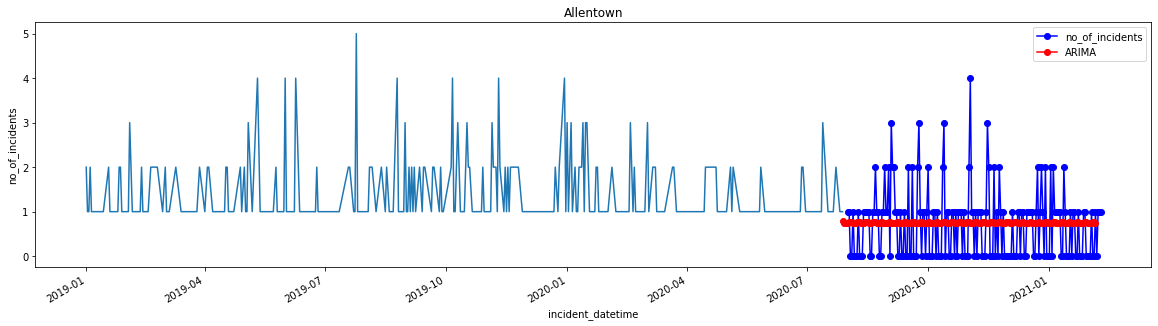

In [59]:
fig, ax = plt.subplots(figsize=(20,5))
chart = sns.lineplot(x='incident_datetime', y='no_of_incidents', data = al_train)
chart.set_title("Allentown")
al_test1.plot(ax=ax, color='blue', marker ='o', legend = True)
forecast1.plot(ax=ax, color='red', marker ='o', legend = True)

## MSE of ARIMA for single neighborhood

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [61]:
mean_squared_error(al_test1['no_of_incidents'].values, forecast1.values, squared = False)

0.7825278469241422